# Google Play Store

## Table of Contents
1. [Importing Packages and Data](#1-importing-packages-and-data-a-id1a-br)

2. [Data Cleaning Phase](#2)
    - [Size](#2.1)
    - [Last Updated](#2.2)
    - [Installs](#2.3)
    - [Current_ver and Android_ver](#2.4)
    - [Rating, Reviews and Price To Numeric](#2.5)
    - [Type](#2.6)
  


3. [EDA Phase](#3)
    - [How many of each category do we have?](#3.1)
    - [What is the distrubution of ratings?](#.3.2)
    - [Which categories had the most installations?](#3.3)
    - [Does category correlate with rating?](#3.4)
    - [How many apps are free vs paid?](#3.5)
    - [What is the relationship between type and number of installs?](#3.6)
    - [What is the relationship between type and ratings?](#3.7)
    - [Distrubution of number of reviews](#3.8)
    - [How does size impact installations?](#3.10)
    - [How does size impact rating?](#3.11)
    - [How does content rating affect number of installations?](#3.12)
    - [Do apps with certain content ratings get more reviews than others?](#3.13)
   


<a id="1"></a>
## 1. Importing Packages and Data <a id="1"></a> <br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('googleplaystore.csv', dtype='str')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10841 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  object
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10840 non-null  object
 9   Genres          10841 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10838 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

<a id="2"></a> 
# 2. Data Cleaning Phase

In [6]:
#Clean columns name
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')


In [7]:
#clean values
def clean_vals(df):
    for col in df.columns:
        df[col] = df[col].str.strip().str.upper().str.replace('\t|\n', '', regex=True)

clean_vals(df)

In [8]:
#check
df.head(3)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19M,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14M,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP


<a id="2.1"></a> <br>
## Size                                                     

We need to see what letter there are in the size column so that we can normalize the data.

In [9]:
print(df['size'].str.replace('\d+', '').unique())

['M' '.M' 'VARIES WITH DEVICE' 'K' '.K' ',+']


we can see that we have our size data in the form of megabytes, kilobytes and unknown.

In [10]:
df.loc[df['size'].str.contains('M')].head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19M,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14M,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",FREE,0,TEEN,ART & DESIGN,"JUNE 8, 2018",VARIES WITH DEVICE,4.2 AND UP
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",FREE,0,EVERYONE,ART & DESIGN;CREATIVITY,"JUNE 20, 2018",1.1,4.4 AND UP


In [11]:
#Convert MB to KB
df.loc[df['size'].str.contains('M'), 'size'] = df.loc[df['size'].str.contains('M'), 'size'].str.rstrip('M').astype(float) * 1024

In [12]:
df.head(3)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",FREE,0,EVERYONE,ART & DESIGN,"JANUARY 7, 2018",1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,"JANUARY 15, 2018",2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",FREE,0,EVERYONE,ART & DESIGN,"AUGUST 1, 2018",1.2.4,4.0.3 AND UP


In [13]:
df.loc[df['size'].astype(str).str.contains('K'), 'size'] = df.loc[df['size'].astype(str).str.contains('K'), 'size'].str.replace('K', '')
#There are no more values contains 'K'
df.loc[df['size'].astype(str).str.contains('K'), 'size']

Series([], Name: size, dtype: object)

In [14]:
#Adding clarify size column
df.rename(columns = {'size': 'size(kb)'}, inplace=True)

In [15]:
#check
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size(kb)', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

We know that 'varies with device means unkown or NaN. So let replace those values.

In [16]:
df['size(kb)'].replace('VARIES WITH DEVICE', np.nan, inplace=True)

In [17]:
df['size(kb)'].isnull().sum()

1695

There are 1695 rows that have NaN values

In [18]:
#Remove '+' in size(kb) column
df['size(kb)'] = df['size(kb)'].astype(str).str.replace('+', '', regex=False)

In [19]:
#removing commas
df['size(kb)'] = df['size(kb)'].str.replace(',', '')

In [20]:
#Convert size columns to numeric
df['size(kb)'] = pd.to_numeric(df['size(kb)'], errors='coerce')

__NaN values in size column__  
To deal with these missing values, we can fill them the mean value, groupby category.

In [21]:
df['size(kb)'] = df['size(kb)'].astype(float).fillna(df.groupby('category')['size(kb)'].transform('mean'))

In [22]:
#check
df.isnull().sum()

app                  0
category             0
rating            1474
reviews              0
size(kb)             0
installs             0
type                 1
price                0
content_rating       1
genres               0
last_updated         0
current_ver          8
android_ver          3
dtype: int64

<a id="2.2"></a> <br>
## Last Updated

For this  analysis, i only want the year so let remove everything before the comma in the last_updated.

In [23]:
df['last_updated'].unique()

array(['JANUARY 7, 2018', 'JANUARY 15, 2018', 'AUGUST 1, 2018', ...,
       'JANUARY 20, 2014', 'FEBRUARY 16, 2014', 'MARCH 23, 2014'],
      dtype=object)

Remove this rows from the dataframe

In [24]:
cond= df.loc[df['last_updated'] == '1.0.19'].index
df.drop(cond, inplace=True)

In [25]:
df['last_updated'] = pd.to_datetime(df['last_updated']).dt.year

In [26]:
#check
df['last_updated']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: last_updated, Length: 10840, dtype: int64

<a id="2.3"></a> <br>
## Installs

Remove non numeric digits and convert the datatype to numeric.

In [27]:
df['installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [28]:
def remove_plus(df, col):
    df[col] = df[col].astype(str).str.replace('+', '', regex=False)
remove_plus(df, 'installs')

In [29]:
df.head(3)

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.0,"10,000",FREE,0,EVERYONE,ART & DESIGN,2018,1.0.0,4.0.3 AND UP
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.0,"500,000",FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,2018,2.0.0,4.0.3 AND UP
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000",FREE,0,EVERYONE,ART & DESIGN,2018,1.2.4,4.0.3 AND UP


In [30]:
def remove_commas(df, col):
    df[col] = df[col].str.replace(',', '')
remove_commas(df, 'installs')

In [31]:
df['installs'] = pd.to_numeric(df['installs'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10840 non-null  object 
 1   category        10840 non-null  object 
 2   rating          9366 non-null   object 
 3   reviews         10840 non-null  object 
 4   size(kb)        10840 non-null  float64
 5   installs        10840 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10840 non-null  object 
 8   content_rating  10840 non-null  object 
 9   genres          10840 non-null  object 
 10  last_updated    10840 non-null  int64  
 11  current_ver     10832 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.2+ MB


<a id="2.4"></a> <br>
## Curent_ver and Android_ver

We don't need these columns for this analysis so we will remove those.

In [33]:
df = df.drop(['current_ver', 'android_ver'], axis=1)

In [34]:
df.head()

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
0,PHOTO EDITOR & CANDY CAMERA & GRID & SCRAPBOOK,ART_AND_DESIGN,4.1,159,19456.0,10000,FREE,0,EVERYONE,ART & DESIGN,2018
1,COLORING BOOK MOANA,ART_AND_DESIGN,3.9,967,14336.0,500000,FREE,0,EVERYONE,ART & DESIGN;PRETEND PLAY,2018
2,"U LAUNCHER LITE – FREE LIVE COOL THEMES, HIDE ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,FREE,0,EVERYONE,ART & DESIGN,2018
3,SKETCH - DRAW & PAINT,ART_AND_DESIGN,4.5,215644,25600.0,50000000,FREE,0,TEEN,ART & DESIGN,2018
4,PIXEL DRAW - NUMBER ART COLORING BOOK,ART_AND_DESIGN,4.3,967,2867.2,100000,FREE,0,EVERYONE,ART & DESIGN;CREATIVITY,2018


<a id="2.5"></a> <br>
## Rating, Reviews and Price to Numeric

Remove $ from price column

In [35]:
def remove_money_symbol(df, col):
    df[col] = pd.to_numeric(df[col].str.replace('$',''))
remove_money_symbol(df, 'price')

Covert rating, price, reviews columns to numeric

In [36]:
def to_numeric(df, col):
    df[col] = pd.to_numeric(df[col])
to_numeric(df, 'rating')
to_numeric(df, 'price')
to_numeric(df, 'reviews')

Fill NaN values in price, rating columns by mean values of category

In [37]:
df['price'] = df['price'].astype(float).fillna(df.groupby('category')['price'].transform('mean'))

In [38]:
df['rating'] = df['rating'].astype(float).fillna(df.groupby('category')['rating'].transform('mean'))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10840 non-null  object 
 1   category        10840 non-null  object 
 2   rating          10840 non-null  float64
 3   reviews         10840 non-null  int64  
 4   size(kb)        10840 non-null  float64
 5   installs        10840 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10840 non-null  float64
 8   content_rating  10840 non-null  object 
 9   genres          10840 non-null  object 
 10  last_updated    10840 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1016.2+ KB


<a id="2.6"></a> <br>
## Type

There are one null value> It seems nonsensical so we can droup this row.

In [40]:
df.loc[df['type'].isnull()]

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
9148,COMMAND & CONQUER: RIVALS,FAMILY,4.192272,0,28998.679803,0,NaN,0.0,EVERYONE 10+,STRATEGY,2018


In [41]:
df.dropna(subset=['type'], inplace=True)

__Let's do final check of the data__

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10839 non-null  object 
 1   category        10839 non-null  object 
 2   rating          10839 non-null  float64
 3   reviews         10839 non-null  int64  
 4   size(kb)        10839 non-null  float64
 5   installs        10839 non-null  int64  
 6   type            10839 non-null  object 
 7   price           10839 non-null  float64
 8   content_rating  10839 non-null  object 
 9   genres          10839 non-null  object 
 10  last_updated    10839 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1016.2+ KB


In [43]:
df.sample(5)

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
1836,ROLLERCOASTER TYCOON® CLASSIC,GAME,4.600000,10795,70656.0,100000,PAID,5.99,EVERYONE,SIMULATION,2017
8776,DR. GOMOKU,GAME,3.900000,85317,4608.0,5000000,FREE,0.00,EVERYONE,BOARD,2018
10033,ETERNITY WARRIORS 2,GAME,4.600000,568391,5324.8,5000000,FREE,0.00,TEEN,ACTION,2014
998,LOL PICS (FUNNY PICTURES),ENTERTAINMENT,4.400000,67554,7884.8,1000000,FREE,0.00,TEEN,ENTERTAINMENT,2015
7882,TUTORIAL CT SCAN CARDIAC,MEDICAL,4.189143,1,15360.0,1000,FREE,0.00,EVERYONE,MEDICAL,2018


<a id="3"></a> <br>
# 3. EDA Phase

<a id="3.1"></a> <br>
### How many of each category do we have?

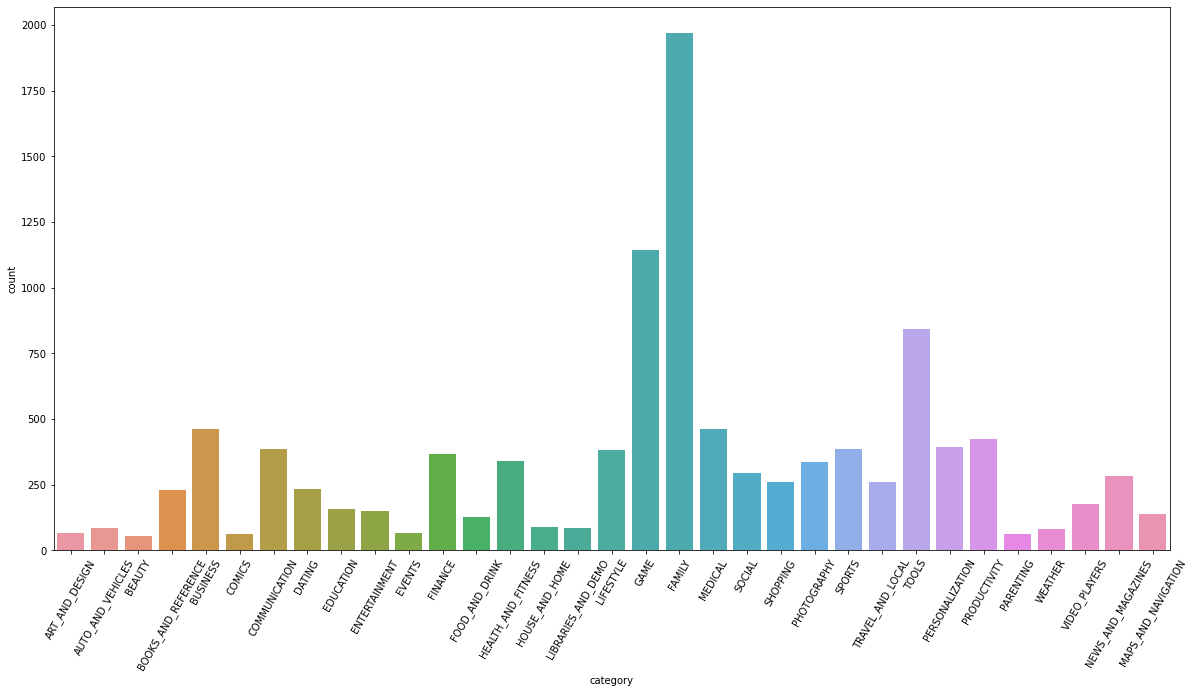

In [44]:
plt.figure(figsize=(20, 10))
fig = sns.countplot(df['category'])
plt.xticks(rotation=60)
plt.show()

<a id="3.2"></a> <br>
### What is the distributon of rating?

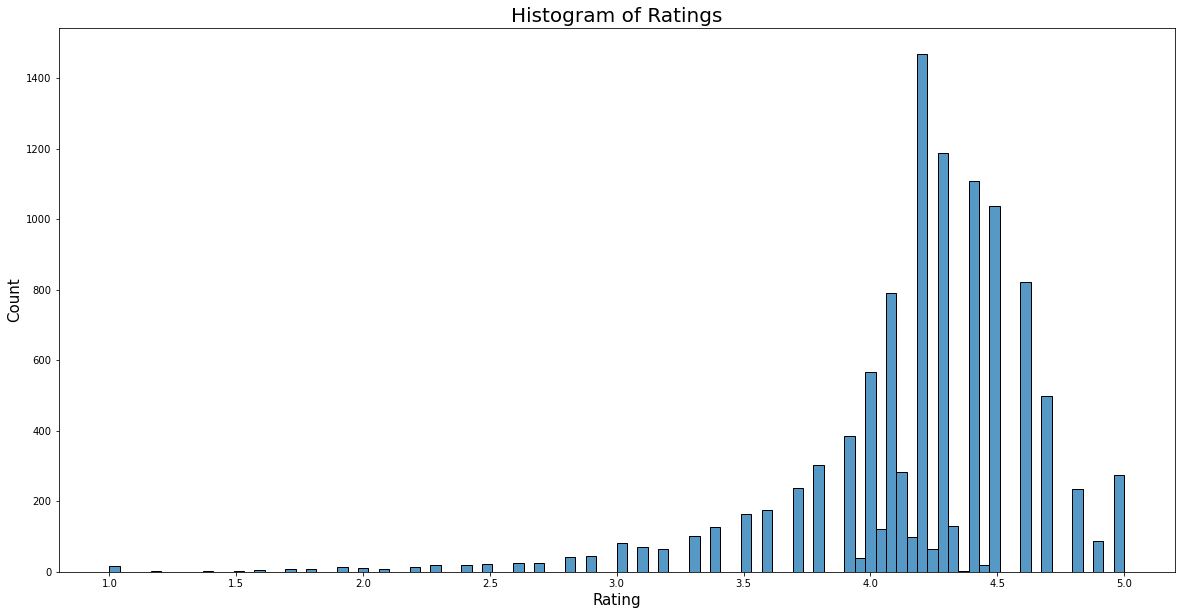

In [45]:
plt.figure(figsize=(20, 10))
g = sns.histplot(df['rating'])
g.set_title('Histogram of Ratings', fontsize=20)
g.set_xlabel('Rating', fontsize=15)
g.set_ylabel('Count', fontsize=15)
plt.show()

<a id="3.3"></a> <br>
### Which categories had the most installations?

In [46]:
in_cat = df.groupby('category')['installs'].sum()
in_cat = pd.DataFrame(in_cat).sort_values(by = 'installs', ascending = False).head(20)

In [47]:
in_cat

,installs
category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'GAME'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'PRODUCTIVITY'),
  Text(3, 0, 'SOCIAL'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'FAMILY'),
  Text(6, 0, 'PHOTOGRAPHY'),
  Text(7, 0, 'NEWS_AND_MAGAZINES'),
  Text(8, 0, 'TRAVEL_AND_LOCAL'),
  Text(9, 0, 'VIDEO_PLAYERS'),
  Text(10, 0, 'SHOPPING'),
  Text(11, 0, 'ENTERTAINMENT'),
  Text(12, 0, 'PERSONALIZATION'),
  Text(13, 0, 'BOOKS_AND_REFERENCE'),
  Text(14, 0, 'SPORTS'),
  Text(15, 0, 'HEALTH_AND_FITNESS'),
  Text(16, 0, 'BUSINESS'),
  Text(17, 0, 'FINANCE'),
  Text(18, 0, 'EDUCATION'),
  Text(19, 0, 'MAPS_AND_NAVIGATION')])

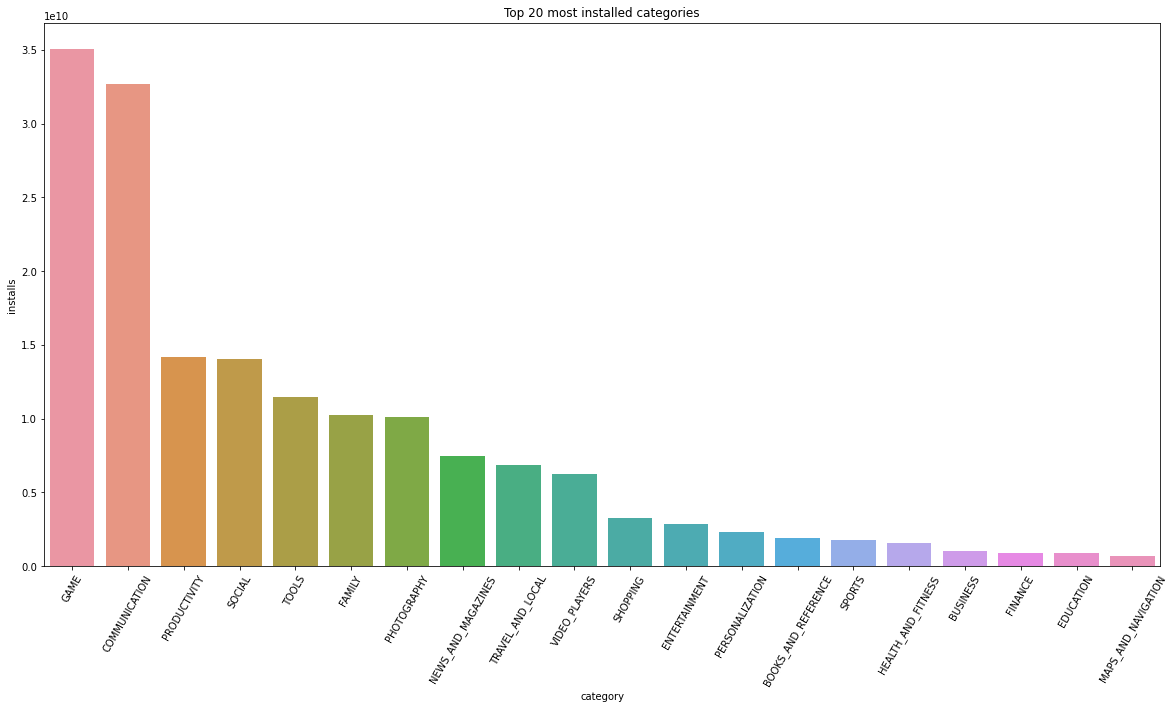

In [48]:
plt.figure(figsize=(20, 10))
sns.barplot(data=in_cat, x=in_cat.index, y=in_cat['installs'])
plt.title('Top 20 most installed categories')
plt.xticks(rotation=60)

In [49]:
ga_cat =df[ df['category']=='GAME'].sort_values(by='installs', ascending=False).head(10)

In [50]:
ga_cat

,app,category,rating,reviews,size(kb),installs,type,price,content_rating,genres,last_updated
1750,SUBWAY SURFERS,GAME,4.5,27724094,77824.0,1000000000,FREE,0.0,EVERYONE 10+,ARCADE,2018
1654,SUBWAY SURFERS,GAME,4.5,27722264,77824.0,1000000000,FREE,0.0,EVERYONE 10+,ARCADE,2018
1700,SUBWAY SURFERS,GAME,4.5,27723193,77824.0,1000000000,FREE,0.0,EVERYONE 10+,ARCADE,2018
1917,SUBWAY SURFERS,GAME,4.5,27725352,77824.0,1000000000,FREE,0.0,EVERYONE 10+,ARCADE,2018
3896,SUBWAY SURFERS,GAME,4.5,27711703,77824.0,1000000000,FREE,0.0,EVERYONE 10+,ARCADE,2018
1872,SUBWAY SURFERS,GAME,4.5,27725352,77824.0,1000000000,FREE,0.0,EVERYONE 10+,ARCADE,2018
1886,TEMPLE RUN 2,GAME,4.3,8119151,63488.0,500000000,FREE,0.0,EVERYONE,ACTION,2018
1705,CANDY CRUSH SAGA,GAME,4.4,22428456,75776.0,500000000,FREE,0.0,EVERYONE,CASUAL,2018
1920,TEMPLE RUN 2,GAME,4.3,8119154,63488.0,500000000,FREE,0.0,EVERYONE,ACTION,2018
1702,POU,GAME,4.3,10485334,24576.0,500000000,FREE,0.0,EVERYONE,CASUAL,2018


<a id="3.4"></a> <br>
### Does category correlate with rating?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

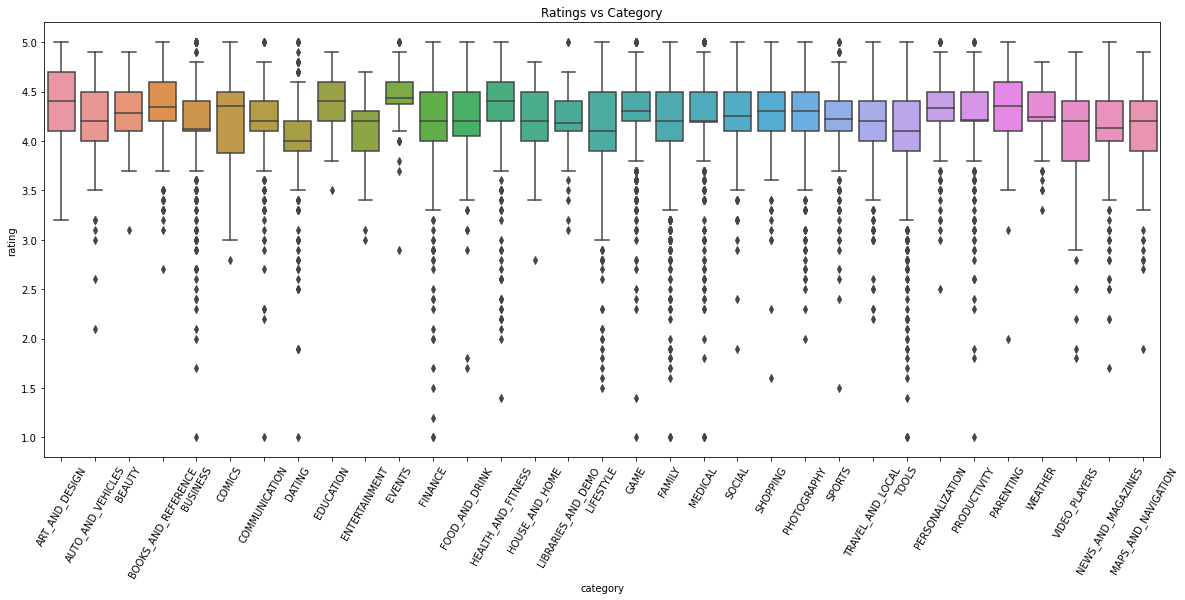

In [51]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='category', y = 'rating')
plt.title('Ratings vs Category')
plt.xticks(rotation=60)

We can see from these boxplots the mean of ratings across the different categories do not some very different.

<a id="3.5"></a> <br>
### How many apps are free and paid?

Text(0.5, 1.0, 'Number of free and Paid Apps')

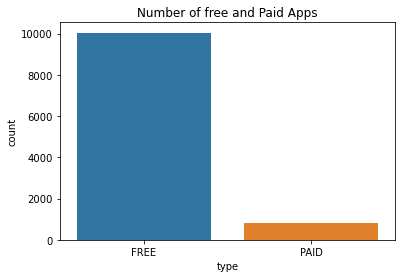

In [52]:
sns.countplot(data=df, x='type')
plt.title('Number of free and Paid Apps')

<a id="3.6"></a> <br>
### What is the relationship between apps being type and number of installs?

In [53]:
type_ins = df.groupby('type')['installs'].sum().reset_index()

In [54]:
type_ins

,type,installs
0,FREE,167560477406
1,PAID,72956081


(array([0, 1]), [Text(0, 0, 'FREE'), Text(1, 0, 'PAID')])

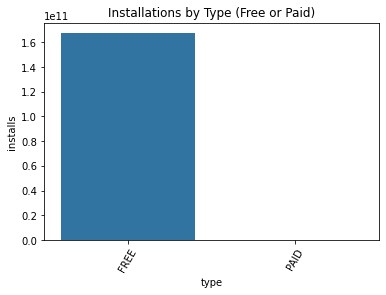

In [55]:
sns.barplot(data=type_ins, x='type', y = 'installs')
plt.title('Installations by Type (Free or Paid)')
plt.xticks(rotation=60)

<a id="3.7"></a> <br>
### What is the relationship between type and ratings?

Text(0.5, 1.0, 'Rating and Type')

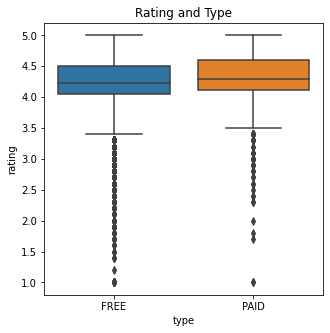

In [56]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df, x='type', y='rating')
plt.title('Rating and Type')

Rating of Paid apps are higher than free apps.

<a id="3.8"></a> <br>
### Distributions of number of reviews

Text(0.5, 1.0, 'Distribution of Reviews')

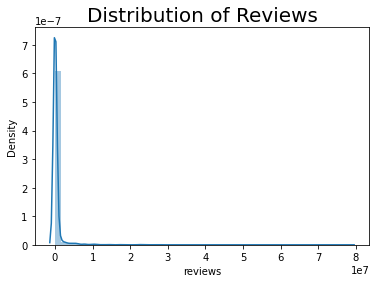

In [57]:
sns.distplot(df['reviews'])
plt.title('Distribution of Reviews', size=20)

The vast majority of apps have less than 10M reviews.

<a id="3.9"></a> <br>
### Correction between installs and reviews

<AxesSubplot:>

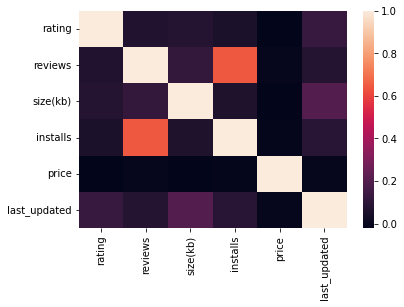

In [58]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

As we can see, The correction between reviews and installs is positive correction.

<a id="3.10"></a> <br>
### How does size impact installations?

Text(0.5, 1.0, 'Size and Installs')

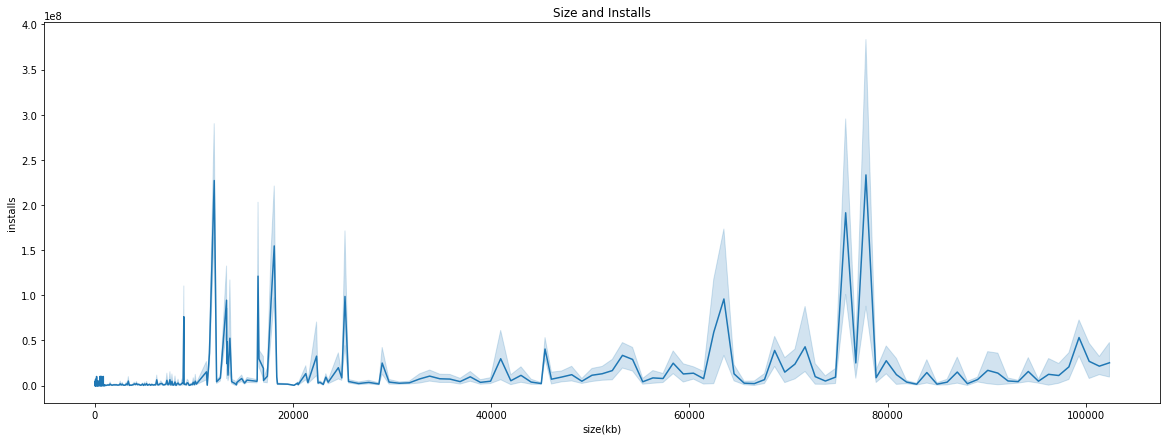

In [59]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=df, x='size(kb)', y ='installs')
plt.title('Size and Installs')

We can see that there seems to be a couple of sweet spots, from about 10000kb to 18000kb, and then from 75000kb to 80000kb in terms of installtions.

<a id="3.11"></a> <br>
### How does size impact rating?

<Figure size 720x720 with 0 Axes>

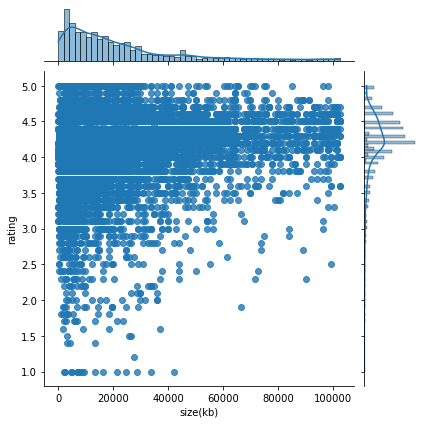

In [60]:
plt.figure(figsize=(10, 10))
sns.jointplot(data=df, x='size(kb)', y = 'rating', kind='reg')

This graph suggests that apps with a lower size have more varied rating. Meaning that as we increase in size, the ratings tend to fall less.

<a id="3.12"></a> <br>
### How does content rating affect number of installations?

Text(0.5, 1.0, 'Installations by Content Rating')

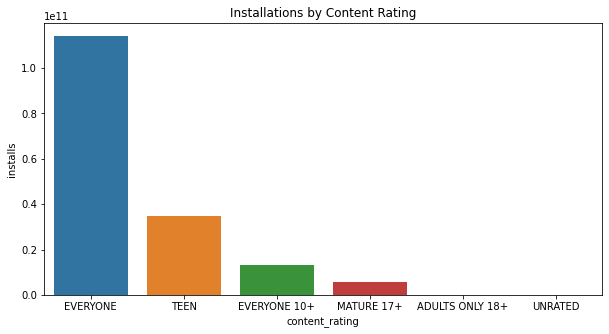

In [108]:
in_cr = df.groupby('content_rating')['installs'].sum()
in_cr = pd.DataFrame(in_cr).reset_index()

plt.figure(figsize=(10, 5))
order = df.groupby(['content_rating'])['installs'].sum().sort_values(ascending=False).index
sns.barplot(data=in_cr, x='content_rating', y='installs', order=order)
plt.title('Installations by Content Rating')

It's easy to understand that Installations of 'Everyone' highest.

<a id="3.13"></a> <br>
### Do Apps with certain content ratings get more reviews than others?

<AxesSubplot:xlabel='content_rating', ylabel='reviews'>

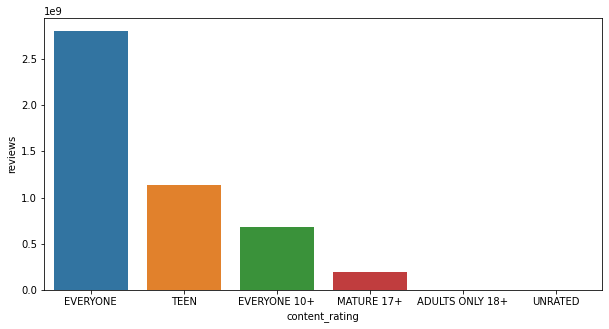

In [119]:
cr_re = df.groupby('content_rating')['reviews'].sum()
cr_re = pd.DataFrame(cr_re).reset_index()

plt.figure(figsize=(10,5))
order = df.groupby('content_rating')['reviews'].sum().sort_values(ascending=False).index
sns.barplot(data=cr_re, x='content_rating', y ='reviews', order=order)

It's quite similar to the chart above.

__Is there a correlation between rating and year last updated?__

<Figure size 720x360 with 0 Axes>

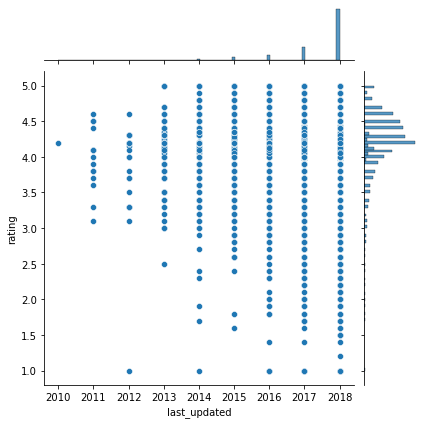

In [121]:
plt.figure(figsize=(10,5))
sns.jointplot(data=df, x='last_updated', y='rating')

There seems to be more variation in rating in apps that have been updated more recently. That maybe just because there are more installations in apps last updated more recently.

<AxesSubplot:xlabel='last_updated', ylabel='installs'>

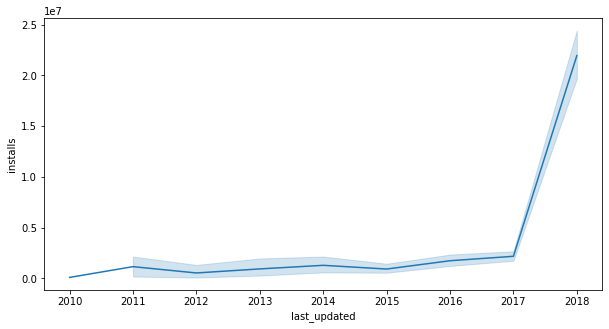

In [122]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='last_updated', y='installs')

That's correct. It seems as though the variety in ratings comes from tha fact that there are vastly more installs in apps last updated more frequently, specially in the year 2018.